In [ ]:
#importing the libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.11.0


In [ ]:
"""import zipfile
import os"""

'import zipfile\nimport os'

In [ ]:
"""!wget --no-check-certificate \
    "https://github.com/krishnaik06/Malaria-Detection/blob/master/Dataset.zip" \
    -O "/tmp/Dataset.zip"


zip_ref = zipfile.ZipFile('/tmp/Dataset.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()"""

'!wget --no-check-certificate     "https://github.com/krishnaik06/Malaria-Detection/blob/master/Dataset.zip"     -O "/tmp/Dataset.zip"\n\n\nzip_ref = zipfile.ZipFile(\'/tmp/Dataset.zip\', \'r\') #Opens the zip file in read mode\nzip_ref.extractall(\'/tmp\') #Extracts the files into the /tmp folder\nzip_ref.close()'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#resize all the Images to this
IMAGE_SIZE = [224,224]
train_path = '/content/drive/MyDrive/Dataset/Train'
test_path = '/content/drive/MyDrive/Dataset/Test'

In [ ]:
#Importing VGG19 libraries as shown and adding preprocesiing layer to the front of VGG


vgg19= VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top= False)

80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
vgg19.summary()


Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg19.layers:
  layer.trainable = False

In [ ]:
#useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset*')

In [ ]:
folders

['/content/drive/MyDrive/Dataset.zip', '/content/drive/MyDrive/Dataset']

In [ ]:
x= Flatten()(vgg19.output)


In [ ]:
prediction = Dense(len(folders),activation='softmax')(x)

#Creating a model object
model = Model(inputs=vgg19.input, outputs=prediction)


In [ ]:
#view the structure of the model
model.summary()
 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.layers import MaxPooling2D


In [ ]:
from tensorflow.python.ops.math_ops import add
"""model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2, padding="same", activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same", activation="relu"))
model.add(MaxPooling2d(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2, padding="same", activation="relu"))
model.add(Maxpooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()"""
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
from keras.api._v2.keras import metrics
from keras.api._v2.keras import optimizers
#tell model what cost and optimisation method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics='accuracy'
)

In [ ]:
from keras.api._v2 import keras
#use the Image Data Genereator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1./  255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip= True
                                  )
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                                 target_size = (224,224),
                                                 batch_size=32,
                                                 class_mode='categorical'
                                                 )

Found 416 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode = 'categorical'
                                            )

Found 134 images belonging to 2 classes.


In [ ]:
#fit the model
#Run the cell. It will take some time to execute

In [ ]:
r=model.fit(
    training_set,
    validation_data = test_set,
    epochs=10,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/10
13/13 [==============================] - 207s 16s/step - loss: 1.6493 - accuracy: 0.4712 - val_loss: 0.7196 - val_accuracy: 0.3209
Epoch 2/10
13/13 [==============================] - 30s 2s/step - loss: 0.6892 - accuracy: 0.5505 - val_loss: 0.6781 - val_accuracy: 0.6791
Epoch 3/10
13/13 [==============================] - 30s 2s/step - loss: 0.6903 - accuracy: 0.5288 - val_loss: 0.6775 - val_accuracy: 0.6791
Epoch 4/10
13/13 [==============================] - 35s 3s/step - loss: 0.6844 - accuracy: 0.5288 - val_loss: 0.6787 - val_accuracy: 0.6791
Epoch 5/10
13/13 [==============================] - 30s 2s/step - loss: 0.6690 - accuracy: 0.5409 - val_loss: 0.7021 - val_accuracy: 0.4478
Epoch 6/10
13/13 [==============================] - 32s 2s/step - loss: 0.6544 - accuracy: 0.6034 - val_loss: 0.7117 - val_accuracy: 0.4328
Epoch 7/10
13/13 [==============================] - 30s 2s/step - loss: 0.6072 - accuracy: 0.6514 - val_loss: 0.7463 - val_accuracy: 0.4254
Epoch 8/10
13/13 [

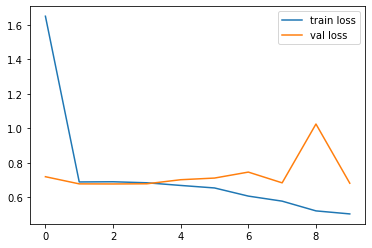

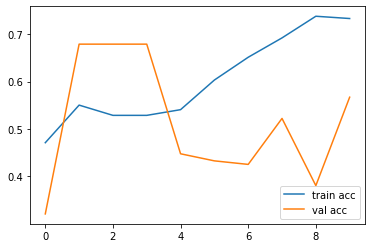

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot accuracy
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'], label ='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')



In [ ]:
#save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [ ]:
y_predict = model.predict(test_set)

5/5 [==============================] - 2s 375ms/step


In [ ]:
y_predict

array([[0.17738464, 0.8226154 ],
       [0.571202  , 0.42879805],
       [0.42949468, 0.57050526],
       [0.5793686 , 0.42063138],
       [0.6191918 , 0.38080814],
       [0.53546685, 0.4645331 ],
       [0.4428473 , 0.5571527 ],
       [0.5020937 , 0.4979063 ],
       [0.64899415, 0.35100588],
       [0.69122326, 0.30877674],
       [0.89677405, 0.10322598],
       [0.69246733, 0.3075327 ],
       [0.672862  , 0.32713807],
       [0.45722124, 0.5427787 ],
       [0.433902  , 0.566098  ],
       [0.67254376, 0.32745612],
       [0.49584538, 0.50415474],
       [0.32667828, 0.6733217 ],
       [0.45593977, 0.5440602 ],
       [0.7935233 , 0.2064767 ],
       [0.6738813 , 0.32611874],
       [0.43807784, 0.5619221 ],
       [0.77120197, 0.22879797],
       [0.6730019 , 0.32699805],
       [0.432937  , 0.567063  ],
       [0.54525924, 0.45474076],
       [0.28307748, 0.71692246],
       [0.83853453, 0.16146536],
       [0.3627654 , 0.6372347 ],
       [0.5652872 , 0.43471274],
       [0.

In [ ]:
import numpy as np
y_pred = np.argmax(y_predict, axis=1)

In [ ]:
y_predict

array([[0.17738464, 0.8226154 ],
       [0.571202  , 0.42879805],
       [0.42949468, 0.57050526],
       [0.5793686 , 0.42063138],
       [0.6191918 , 0.38080814],
       [0.53546685, 0.4645331 ],
       [0.4428473 , 0.5571527 ],
       [0.5020937 , 0.4979063 ],
       [0.64899415, 0.35100588],
       [0.69122326, 0.30877674],
       [0.89677405, 0.10322598],
       [0.69246733, 0.3075327 ],
       [0.672862  , 0.32713807],
       [0.45722124, 0.5427787 ],
       [0.433902  , 0.566098  ],
       [0.67254376, 0.32745612],
       [0.49584538, 0.50415474],
       [0.32667828, 0.6733217 ],
       [0.45593977, 0.5440602 ],
       [0.7935233 , 0.2064767 ],
       [0.6738813 , 0.32611874],
       [0.43807784, 0.5619221 ],
       [0.77120197, 0.22879797],
       [0.6730019 , 0.32699805],
       [0.432937  , 0.567063  ],
       [0.54525924, 0.45474076],
       [0.28307748, 0.71692246],
       [0.83853453, 0.16146536],
       [0.3627654 , 0.6372347 ],
       [0.5652872 , 0.43471274],
       [0.

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model('model_vgg19.h5')


In [ ]:
img=image.load_img('/content/drive/MyDrive/Dataset/Test/Uninfected/2.png', target_size=(224,224))

In [ ]:
img=image.load_img('/content/drive/MyDrive/Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_110115_cell_136.png', target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 0s 67ms/step


array([[0., 1.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 73ms/step


In [ ]:
if(a==1):
  print("Uninfected")
else:

  print("Infected")

Uninfected


In [1]:
import pickle

In [4]:
pickle.dump(model, open('mlmodel.pkl','wb'))

NameError: ignored